# Recommender System


## Dataset - MovieLen
https://grouplens.org/datasets/movielens/

### Types of RecSys
- Content-based
- Collaborative filting

## Data
### Two tables for movielens dataset
- ratings: User-movieid-rating matrix

- movies: Movie profile

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [2]:
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')

In [3]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
df_ratings.groupby("userId").count()["rating"]

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

In [5]:
df_ratings.groupby("rating").agg({"userId":"count"})

,userId
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


(array([ 1370.,  2811.,  1791.,  7551.,  5550., 20047., 13136., 26818.,
         8551., 13211.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

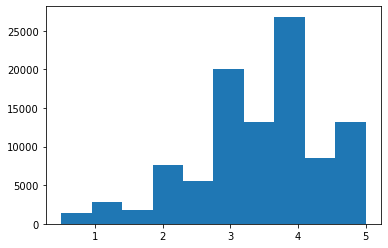

In [6]:
plt.hist(df_ratings["rating"])

In [7]:
df_ratings.groupby("movieId")["rating"].mean()

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [8]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


## Recommendation system Part I: Popularity of movie

## Top k popular movie 

In [9]:
#transform the timestamp column of df_ratings into actual time

In [10]:
import time
from datetime import datetime

In [11]:
df_ratings["time"]=df_ratings["timestamp"].apply(lambda x:datetime.fromtimestamp(x).strftime("%Y-%m-%d"))

In [12]:
df_ratings.head()

,userId,movieId,rating,timestamp,time
0,1,1,4.0,964982703,2000-07-30
1,1,3,4.0,964981247,2000-07-30
2,1,6,4.0,964982224,2000-07-30
3,1,47,5.0,964983815,2000-07-30
4,1,50,5.0,964982931,2000-07-30


In [13]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
def getTopK(df_ratings_,df_movies_,min_score=4,k=10,start_date='2017-09-01',end_date='2018-09-01'):
    df_mr=pd.merge(df_ratings_,df_movies_,on="movieId")
    df_mr=df_mr[(df_mr["time"]>start_date)&(df_mr["time"]<=end_date)]
    df_mr=df_mr.groupby(["title","genres"]).agg({"rating":"mean","userId":"nunique"}).reset_index("genres")
    df_mr=df_mr[df_mr["rating"]>min_score]
    df_mr.rename(columns={"rating": "avg_rating", "userId": "no_user_rating"},inplace=True)
    return df_mr.sort_values(["no_user_rating","avg_rating"],ascending=False).head(k)

In [15]:
getTopK(df_ratings,df_movies)

,genres,avg_rating,no_user_rating
title,,,
Forrest Gump (1994),Comedy|Drama|Romance|War,4.134615,26
"Shawshank Redemption, The (1994)",Crime|Drama,4.456522,23
Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,4.086957,23
Fight Club (1999),Action|Crime|Drama|Thriller,4.047619,21
"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,4.025000,20
Up (2009),Adventure|Animation|Children|Drama,4.157895,19
Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.052632,19
Good Will Hunting (1997),Drama|Romance,4.333333,18
"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,4.138889,18


In [16]:
getTopK(df_ratings,df_movies,min_score=4.5,k=5)

,genres,avg_rating,no_user_rating
title,,,
"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,4.750000,8
Alien (1979),Horror|Sci-Fi,4.642857,7
12 Angry Men (1957),Drama,4.875000,4
There Will Be Blood (2007),Drama|Western,4.750000,4
Black Mirror: White Christmas (2014),Drama|Horror|Mystery|Sci-Fi|Thriller,5.000000,3


In [19]:
getTopK(df_ratings,df_movies,k=5,start_date='2018-09-01',end_date='2019-09-01')

,genres,avg_rating,no_user_rating
title,,,
"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,5.00,2
Whiplash (2014),Drama,5.00,2
"Big Short, The (2015)",Drama,4.75,2
"Grand Budapest Hotel, The (2014)",Comedy|Drama,4.75,2
Coco (2017),Adventure|Animation|Children,4.50,2


## Recommendation system Part II: Content-based

## Top k similar movies

In [21]:
#getting similar movies according to their genres
#determine the similarity scores by cosine similarity

In [20]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [22]:
df_movies["genres"][0].split('|')

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [23]:
#getting all the genres
l_g=df_movies["genres"]
s=set([])
for i in range(len(l_g)):
    s=s.union(set(l_g[i].split('|')))
all_genres=list(s)

In [24]:
all_genres

['Drama',
 'Comedy',
 'Documentary',
 'Horror',
 'War',
 'Thriller',
 '(no genres listed)',
 'Fantasy',
 'Musical',
 'IMAX',
 'Film-Noir',
 'Animation',
 'Action',
 'Adventure',
 'Crime',
 'Sci-Fi',
 'Western',
 'Mystery',
 'Romance',
 'Children']

In [25]:
[genre in df_movies["genres"][0].split('|') for genre in all_genres]

[False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True]

In [26]:
t0=[genre in df_movies["genres"][0].split('|') for genre in all_genres]
t1=[genre in df_movies["genres"][1].split('|') for genre in all_genres]
np.dot(t0,t1)

True

In [36]:
t0=np.array([genre in df_movies["genres"][0].split('|') for genre in all_genres]).astype(int)
t1=np.array([genre in df_movies["genres"][1].split('|') for genre in all_genres]).astype(int)
print(t0)
print(t1)
np.dot(t0,t1)/(np.linalg.norm(t0)*np.linalg.norm(t1))

[0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]


0.7745966692414834

In [27]:
df_movies["genres"].apply(lambda x:np.array([genre in x.split('|') for genre in all_genres]).astype(int))

0       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...
2       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
9737    [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, ...
9738    [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...
9739    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9740    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...
9741    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres, Length: 9742, dtype: object

In [28]:
def cos_similar(x,y):
    x_n=x/np.linalg.norm(x)
    y_n=y/np.linalg.norm(y)
    return np.dot(x_n,y_n)

In [29]:
df_movies["genres_oh"]=df_movies["genres"].apply(lambda x:np.array([genre in x.split('|') for genre in all_genres]).astype(int))

In [30]:
movieId=7
movieId_oh=df_movies["genres_oh"][df_movies["movieId"]==movieId].iloc[0]
df_movies["genres_oh"].apply(lambda x:np.dot(x,movieId_oh)/(np.linalg.norm(x)*np.linalg.norm(movieId_oh)))

0       0.316228
1       0.000000
2       1.000000
3       0.816497
4       0.707107
          ...   
9737    0.353553
9738    0.408248
9739    0.000000
9740    0.000000
9741    0.707107
Name: genres_oh, Length: 9742, dtype: float64

In [52]:
movieId=np.random.choice(list(df_movies["movieId"]))
print(movieId)
movieId_oh=df_movies["genres_oh"][df_movies["movieId"]==movieId].iloc[0]
df_movies["genres_oh"].apply(lambda x:cos_similar(x,movieId_oh))

143355


0       0.516398
1       0.666667
2       0.000000
3       0.000000
4       0.000000
          ...   
9737    0.577350
9738    0.333333
9739    0.000000
9740    0.408248
9741    0.000000
Name: genres_oh, Length: 9742, dtype: float64

In [31]:
def getTopKSimilar(movieId,df_ratings_,df_movies_,min_score=4,min_user=10,k=10,start_date='2015-09-01',end_date='2018-09-01'):
    time_critiea=(df_ratings_["time"]>=start_date)&(df_ratings_["time"]<=end_date)
    df_ratings_s=df_ratings_[time_critiea].groupby("movieId").agg({"rating":"mean","userId":"nunique"})
    df_ratings_s.rename(columns={"rating": "avg_rating", "userId": "no_user_rating"},inplace=True)
    score_user_critiea=(df_ratings_s["avg_rating"]>=min_score)&(df_ratings_s["no_user_rating"]>=min_user)
    df_ratings_s=df_ratings_s[score_user_critiea]
    movieId_oh=df_movies_["genres_oh"][df_movies_["movieId"]==movieId].iloc[0]
    df_movies_["similar_score"]=df_movies_["genres_oh"].apply(lambda x:cos_similar(x,movieId_oh))
    df_mr=pd.merge(df_ratings_s,df_movies_,on="movieId")
    df_mr=df_mr[df_mr["movieId"]!=movieId]
    df_mr=df_mr[["movieId","title","genres","similar_score","no_user_rating","avg_rating"]]
    return df_mr.sort_values(["similar_score","no_user_rating","avg_rating"],ascending=[False]*3).head(k)

In [32]:
movieId=1
print(df_movies[df_movies["movieId"]==movieId]["title"])
getTopKSimilar(movieId,df_ratings,df_movies)

0    Toy Story (1995)
Name: title, dtype: object


,movieId,title,genres,similar_score,no_user_rating,avg_rating
49,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,1.000000,20,4.025000
81,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,0.912871,28,4.017857
78,68954,Up (2009),Adventure|Animation|Children|Drama,0.670820,59,4.000000
66,31658,Howl's Moving Castle (Hauru no ugoku shiro) (2...,Adventure|Animation|Fantasy|Romance,0.670820,14,4.214286
41,2078,"Jungle Book, The (1967)",Animation|Children|Comedy|Musical,0.670820,11,4.136364
16,1073,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical,0.670820,11,4.090909
59,5444,Lilo & Stitch (2002),Adventure|Animation|Children|Sci-Fi,0.670820,11,4.090909
57,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,0.632456,63,4.071429
77,60069,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi,0.600000,54,4.175926
21,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,0.600000,27,4.055556


In [33]:
movieId=115569
print(df_movies[df_movies["movieId"]==movieId]["title"])
getTopKSimilar(movieId,df_ratings,df_movies)

8545    Nightcrawler (2014)
Name: title, dtype: object


,movieId,title,genres,similar_score,no_user_rating,avg_rating
71,48516,"Departed, The (2006)",Crime|Drama|Thriller,1.000000,35,4.257143
72,51540,Zodiac (2007),Crime|Drama|Thriller,1.000000,17,4.029412
56,4776,Training Day (2001),Crime|Drama|Thriller,1.000000,11,4.181818
73,55765,American Gangster (2007),Crime|Drama|Thriller,1.000000,11,4.000000
48,2959,Fight Club (1999),Action|Crime|Drama|Thriller,0.866025,70,4.271429
6,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,0.866025,57,4.201754
11,608,Fargo (1996),Comedy|Crime|Drama|Thriller,0.866025,33,4.045455
5,293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,0.866025,30,4.316667
75,57669,In Bruges (2008),Comedy|Crime|Drama|Thriller,0.866025,18,4.138889
51,3275,"Boondock Saints, The (2000)",Action|Crime|Drama|Thriller,0.866025,11,4.136364


In [34]:
movieId=168250
print(df_movies[df_movies["movieId"]==movieId]["title"])
getTopKSimilar(movieId,df_ratings,df_movies,k=3)

9462    Get Out (2017)
Name: title, dtype: object


,movieId,title,genres,similar_score,no_user_rating,avg_rating
35,1258,"Shining, The (1980)",Horror,1.000000,23,4.434783
30,1214,Alien (1979),Horror|Sci-Fi,0.707107,23,4.195652
10,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,0.577350,56,4.017857


In [35]:
movieId=1214
print(df_movies[df_movies["movieId"]==movieId]["title"])
getTopKSimilar(movieId,df_ratings,df_movies,k=3)

915    Alien (1979)
Name: title, dtype: object


,movieId,title,genres,similar_score,no_user_rating,avg_rating
97,164179,Arrival (2016),Sci-Fi,0.707107,24,4.000000
35,1258,"Shining, The (1980)",Horror,0.707107,23,4.434783
23,1200,Aliens (1986),Action|Adventure|Horror|Sci-Fi,0.707107,20,4.150000


In [36]:
movieId=164179
print(df_movies[df_movies["movieId"]==movieId]["title"])
getTopKSimilar(movieId,df_ratings,df_movies)

9392    Arrival (2016)
Name: title, dtype: object


,movieId,title,genres,similar_score,no_user_rating,avg_rating
98,168252,Logan (2017),Action|Sci-Fi,0.707107,25,4.280000
30,1214,Alien (1979),Horror|Sci-Fi,0.707107,23,4.195652
83,84152,Limitless (2011),Sci-Fi|Thriller,0.707107,17,4.117647
47,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,0.577350,79,4.113924
4,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,0.577350,59,4.093220
95,134130,The Martian (2015),Adventure|Drama|Sci-Fi,0.577350,47,4.000000
20,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,0.577350,46,4.152174
90,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,0.577350,45,4.044444
28,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,0.577350,40,4.200000
36,1270,Back to the Future (1985),Adventure|Comedy|Sci-Fi,0.577350,34,4.235294


In [37]:
movieId=112852
print(df_movies[df_movies["movieId"]==movieId]["title"])
getTopKSimilar(movieId,df_ratings,df_movies)

8475    Guardians of the Galaxy (2014)
Name: title, dtype: object


,movieId,title,genres,similar_score,no_user_rating,avg_rating
4,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1.000000,59,4.093220
20,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,1.000000,46,4.152174
28,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,1.000000,40,4.200000
93,122912,Avengers: Infinity War - Part I (2018),Action|Adventure|Sci-Fi,1.000000,11,4.090909
23,1200,Aliens (1986),Action|Adventure|Horror|Sci-Fi,0.866025,20,4.150000
22,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,0.816497,52,4.105769
37,1291,Indiana Jones and the Last Crusade (1989),Action|Adventure,0.816497,29,4.068966
98,168252,Logan (2017),Action|Sci-Fi,0.816497,25,4.280000
47,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,0.666667,79,4.113924
95,134130,The Martian (2015),Adventure|Drama|Sci-Fi,0.666667,47,4.000000


In [38]:
movieId=122912
print(df_movies[df_movies["movieId"]==movieId]["title"])
getTopKSimilar(movieId,df_ratings,df_movies)

8693    Avengers: Infinity War - Part I (2018)
Name: title, dtype: object


,movieId,title,genres,similar_score,no_user_rating,avg_rating
4,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1.000000,59,4.093220
20,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,1.000000,46,4.152174
90,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,1.000000,45,4.044444
28,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,1.000000,40,4.200000
23,1200,Aliens (1986),Action|Adventure|Horror|Sci-Fi,0.866025,20,4.150000
22,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,0.816497,52,4.105769
37,1291,Indiana Jones and the Last Crusade (1989),Action|Adventure,0.816497,29,4.068966
98,168252,Logan (2017),Action|Sci-Fi,0.816497,25,4.280000
47,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,0.666667,79,4.113924
95,134130,The Martian (2015),Adventure|Drama|Sci-Fi,0.666667,47,4.000000


In [39]:
movieId=59315
print(df_movies[df_movies["movieId"]==movieId]["title"])
getTopKSimilar(movieId,df_ratings,df_movies,min_score=3.5)

6743    Iron Man (2008)
Name: title, dtype: object


,movieId,title,genres,similar_score,no_user_rating,avg_rating
11,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1.0,59,4.093220
50,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,1.0,46,4.152174
363,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,1.0,45,4.044444
59,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,1.0,40,4.200000
136,3793,X-Men (2000),Action|Adventure|Sci-Fi,1.0,27,3.592593
381,122918,Guardians of the Galaxy 2 (2017),Action|Adventure|Sci-Fi,1.0,26,3.903846
377,122900,Ant-Man (2015),Action|Adventure|Sci-Fi,1.0,26,3.711538
383,122922,Doctor Strange (2016),Action|Adventure|Sci-Fi,1.0,21,3.666667
380,122916,Thor: Ragnarok (2017),Action|Adventure|Sci-Fi,1.0,18,3.972222
354,111362,X-Men: Days of Future Past (2014),Action|Adventure|Sci-Fi,1.0,18,3.777778


In [40]:
movieId=3793
print(df_movies[df_movies["movieId"]==movieId]["title"])
getTopKSimilar(movieId,df_ratings,df_movies,min_score=3.5)

2836    X-Men (2000)
Name: title, dtype: object


,movieId,title,genres,similar_score,no_user_rating,avg_rating
11,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1.0,59,4.093220
262,59315,Iron Man (2008),Action|Adventure|Sci-Fi,1.0,48,3.718750
50,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,1.0,46,4.152174
363,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,1.0,45,4.044444
59,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,1.0,40,4.200000
381,122918,Guardians of the Galaxy 2 (2017),Action|Adventure|Sci-Fi,1.0,26,3.903846
377,122900,Ant-Man (2015),Action|Adventure|Sci-Fi,1.0,26,3.711538
383,122922,Doctor Strange (2016),Action|Adventure|Sci-Fi,1.0,21,3.666667
380,122916,Thor: Ragnarok (2017),Action|Adventure|Sci-Fi,1.0,18,3.972222
354,111362,X-Men: Days of Future Past (2014),Action|Adventure|Sci-Fi,1.0,18,3.777778


## Recommendation system Part III: Collaborative Filtering

A collaborative recommender system makes a recommendation based on how similar users liked the item. 

- The system will group users with similar tastes. 
- In addition to user similarity, recommender systems can also perform collaborative filtering using item similarity (like ‘Users who liked this item X also liked Y’).

### Normalized matrix

The goal of MF:
- learn the latent perferences of the users and latent attributes of items
- therefore, predict the unknown ratings from latent vectors

### Singular value decomposition (SVD)

Intro SVD
<img src="https://cdn-images-1.medium.com/max/1600/1*_pYWy9GeJzHGq93j8TObQg.png" width="500">

SVD is an algorithm that decomposes a matrix into the best lower rank (i.e. smaller/simpler) approximation of the original matrix.

- $u$ = user "features" matrix
- Σ = weights/strengths of each concept
- $V^t$  = movie "features" matrix

### use SVD to make predictions

In [42]:
#the rating of the movies given by the users
#if the user did not give the rating, the rating will be given as 0
user_movie=pd.pivot_table(df_ratings,index='userId',columns='movieId',values='rating').fillna(0)

In [43]:
user_movie

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
U_, d_, Vt_ = np.linalg.svd(user_movie)

In [64]:
k=10
U=U_[:,:k]
D=np.diag(d_[:k])
Vt=Vt_[:k,:]

In [65]:
M=pd.DataFrame(U.dot(D).dot(Vt))
M.columns=user_movie.columns
M.index=user_movie.index

In [66]:
M

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,2.861726,0.937778,0.975957,-0.017830,0.216177,1.702736,0.105428,0.000205,0.146076,1.997412,...,-0.012587,-0.010789,-0.014386,-0.014386,-0.012587,-0.014386,-0.012587,-0.012587,-0.012587,-0.019309
2,0.192522,-0.008264,-0.026998,0.003019,0.025943,0.086721,-0.056641,0.012829,-0.012171,-0.078800,...,0.005953,0.005103,0.006803,0.006803,0.005953,0.006803,0.005953,0.005953,0.005953,0.013188
3,0.031622,0.016571,0.019504,-0.004169,-0.015130,0.078697,-0.013183,0.000482,0.007625,0.063260,...,0.000239,0.000205,0.000273,0.000273,0.000239,0.000273,0.000239,0.000239,0.000239,-0.001889
4,1.574333,0.233673,0.278655,0.056570,0.187347,0.267250,0.328903,-0.054729,-0.018870,0.078537,...,-0.001781,-0.001527,-0.002036,-0.002036,-0.001781,-0.002036,-0.001781,-0.001781,-0.001781,-0.010068
5,1.277728,0.976974,0.422940,0.126277,0.537362,0.751711,0.630211,0.116558,0.117054,1.154697,...,0.000582,0.000499,0.000665,0.000665,0.000582,0.000665,0.000582,0.000582,0.000582,-0.000066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.118383,0.905955,-1.318426,0.120352,-0.232132,1.117895,1.974903,-0.229322,-0.148195,-0.197152,...,0.012281,0.010527,0.014036,0.014036,0.012281,0.014036,0.012281,0.012281,0.012281,-0.044651
607,2.492541,1.032177,0.691632,0.027533,0.317121,1.584345,0.348930,0.026033,0.156805,1.881112,...,-0.004370,-0.003746,-0.004994,-0.004994,-0.004370,-0.004994,-0.004370,-0.004370,-0.004370,-0.012968
608,2.809506,1.980359,1.807898,-0.086740,0.447729,3.172752,0.570910,0.362393,0.236866,3.915813,...,-0.048672,-0.041719,-0.055625,-0.055625,-0.048672,-0.055625,-0.048672,-0.048672,-0.048672,-0.003266


In [74]:
userId=600
top=10
movieId_exclu=user_movie.loc[userId,:].sort_values(ascending=False).head(top).index
movieId_sel=[movieId for movieId in user_movie.columns if movieId not in movieId_exclu]
M.loc[userId,movieId_sel].sort_values(ascending=False).head(top)

movieId
1136    4.606602
588     4.515985
595     4.390209
500     4.217118
296     4.200245
3897    4.192867
1       4.190142
2174    4.184091
364     4.178577
356     4.165724
Name: 600, dtype: float64

In [44]:
def getTopK_by_user(userId,df_ratings_,k=10,k_=10):
    user_movie=pd.pivot_table(df_ratings_,index='userId',columns='movieId',values='rating').fillna(0)
    U_, d_, Vt_ = np.linalg.svd(user_movie)
    U=U_[:,:k_]
    D=np.diag(d_[:k_])
    Vt=Vt_[:k_,:]
    M=pd.DataFrame(U.dot(D).dot(Vt))
    M.columns=user_movie.columns
    M.index=user_movie.index
    movieId_inclu=user_movie.T[user_movie.T[userId]!=0][userId].index
    movieId_sel=[movieId for movieId in user_movie.columns if movieId in movieId_inclu]
    return M.loc[userId,movieId_sel].sort_values(ascending=False).head(k)

In [45]:
userId=100
getTopK_by_user(userId,df_ratings,k_=80)

movieId
597     3.893438
1246    3.575955
357     3.359411
356     3.325329
539     3.230211
11      3.218780
1270    3.174771
1307    3.111043
2396    2.994936
1393    2.959439
Name: 100, dtype: float64

In [46]:
userId=np.random.choice(user_movie.index)
print(userId)
for i in range(1,6):
    movies=getTopK_by_user(userId,df_ratings,k_=i*10,k=3)
    print(movies)
    print("")

321
movieId
457    3.095940
150    3.083790
356    3.005606
Name: 321, dtype: float64

movieId
457    3.094727
150    3.059696
356    2.948106
Name: 321, dtype: float64

movieId
150    3.389331
457    3.338418
380    3.191964
Name: 321, dtype: float64

movieId
150    3.400812
480    3.265448
380    3.255597
Name: 321, dtype: float64

movieId
150    3.441454
480    3.409972
380    3.294908
Name: 321, dtype: float64

